In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.insert(0,'/home/daniel/code/dosorio79/code/kolapally/computer_vision')

In [69]:
from compvis.preprocess.face_detect_single import face_detect_single
from compvis.preprocess.face_detection_multiple import face_detect_multiple
from compvis.preprocess.folder_dataset import folder_to_dataset_splits
import matplotlib.pyplot as plt

# Single image - For prediction purposes

In [15]:
crop_path, crop_coord = face_detect_single('/home/daniel/code/dosorio79/code/kolapally/computer_vision/notebooks/DSO_face-detect_haar/img/smokey.png', 'png')

1/1 [==============================] - 0s 320ms/step
/home/daniel/code/dosorio79/code/kolapally/computer_vision/compvis/interface/cropped/image_face0.png is saved
/home/daniel/code/dosorio79/code/kolapally/computer_vision/compvis/interface/cropped/image_face1.png is saved


In [16]:
crop_coord

{'face0': (873, 277, 169, 222), 'face1': (556, 45, 195, 257)}

In [17]:
crop_path

'/home/daniel/code/dosorio79/code/kolapally/computer_vision/compvis/interface/cropped'

# Multiple files - To create Cropped dataset (needs to be checked, skip for now)

In [22]:
crop_path = face_detect_multiple('/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/Multiple_test', 'png')

1/1 [==============================] - 1s 611ms/step
/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/Multiple_test/Brian_Baumgartner/bb2_face0.png is saved


# Create Dataset

In [62]:
train_set, val_set, test_set, class_names = folder_to_dataset_splits('/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/cropped')

Found 1166 files belonging to 6 classes.
Using 933 files for training.
Using 233 files for validation.


In [30]:
train_set.cardinality().numpy()

24

In [31]:
val_set.cardinality().numpy()

6

In [32]:
test_set.cardinality().numpy()

8

In [63]:
class_names

['Angela', 'Dwight', 'Jim', 'Kevin', 'Michael', 'Pam']

# Model instantiation and training

In [71]:
from compvis.model.model import *

In [40]:
model = model_init((128,128,3))

234698864/234698864 [==============================] - 29s 0us/step
✅model initialized
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 4, 4, 2048)        58370944  
                                                                 
 flatten_18 (Flatten)        (None, 32768)             0         
                                                                 
 dense_63 (Dense)            (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_64 (Dense)            (None, 130)               33410     
                                                                 
 dense_65 (Dense)            (None, 6)                 786       
                                   

In [42]:
model = model_compile(model)

✅ model compiled


In [50]:
model, history = model_train(model, train_set, val_set)


Epoch 1/100
24/24 [==============================] - 107s 4s/step - loss: 1.0317 - accuracy: 0.6172 - val_loss: 0.6197 - val_accuracy: 0.8182
Epoch 2/100
24/24 [==============================] - 89s 4s/step - loss: 0.9403 - accuracy: 0.6484 - val_loss: 0.4989 - val_accuracy: 0.8606
Epoch 3/100
24/24 [==============================] - 94s 4s/step - loss: 0.8172 - accuracy: 0.6992 - val_loss: 0.5013 - val_accuracy: 0.8424
Epoch 4/100
24/24 [==============================] - 93s 4s/step - loss: 0.7755 - accuracy: 0.7122 - val_loss: 0.3992 - val_accuracy: 0.8606
Epoch 5/100
24/24 [==============================] - 97s 4s/step - loss: 0.7396 - accuracy: 0.7253 - val_loss: 0.3881 - val_accuracy: 0.8848
Epoch 6/100
24/24 [==============================] - 83s 3s/step - loss: 0.6316 - accuracy: 0.7721 - val_loss: 0.2575 - val_accuracy: 0.9273
Epoch 7/100
24/24 [==============================] - 61s 3s/step - loss: 0.5841 - accuracy: 0.7799 - val_loss: 0.2985 - val_accuracy: 0.9394
Epoch 8/100


NameError: name 'model_save' is not defined

In [56]:
model.save('/home/daniel/code/dosorio79/code/kolapally/computer_vision/compvis/interface/model/20230323_1626_Resnet150-test1.h5')

AttributeError: 'NoneType' object has no attribute 'save'

In [55]:
model_save(model, 'Resnet150-test1')

FileNotFoundError: [Errno 2] No such file or directory

In [57]:
model_eval(model, test_set)

AttributeError: 'NoneType' object has no attribute 'evaluate'

# Loaded an external model from K

In [65]:
model = model_load('/home/daniel/code/dosorio79/code/kolapally/computer_vision/compvis/interface/models/model.h5')

✅ Model loaded from local disk


In [72]:
label, images = model_predict(model, '/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/cast/mix', class_names, target_size=(128,128))

1/1 [==============================] - 0s 427ms/step
✅ Prediction completed


In [67]:
label

['Jim',
 'Kevin',
 'Pam',
 'Jim',
 'Dwight',
 'Dwight',
 'Pam',
 'Pam',
 'Pam',
 'Kevin',
 'Angela',
 'Dwight']

In [68]:
images

[<PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>]

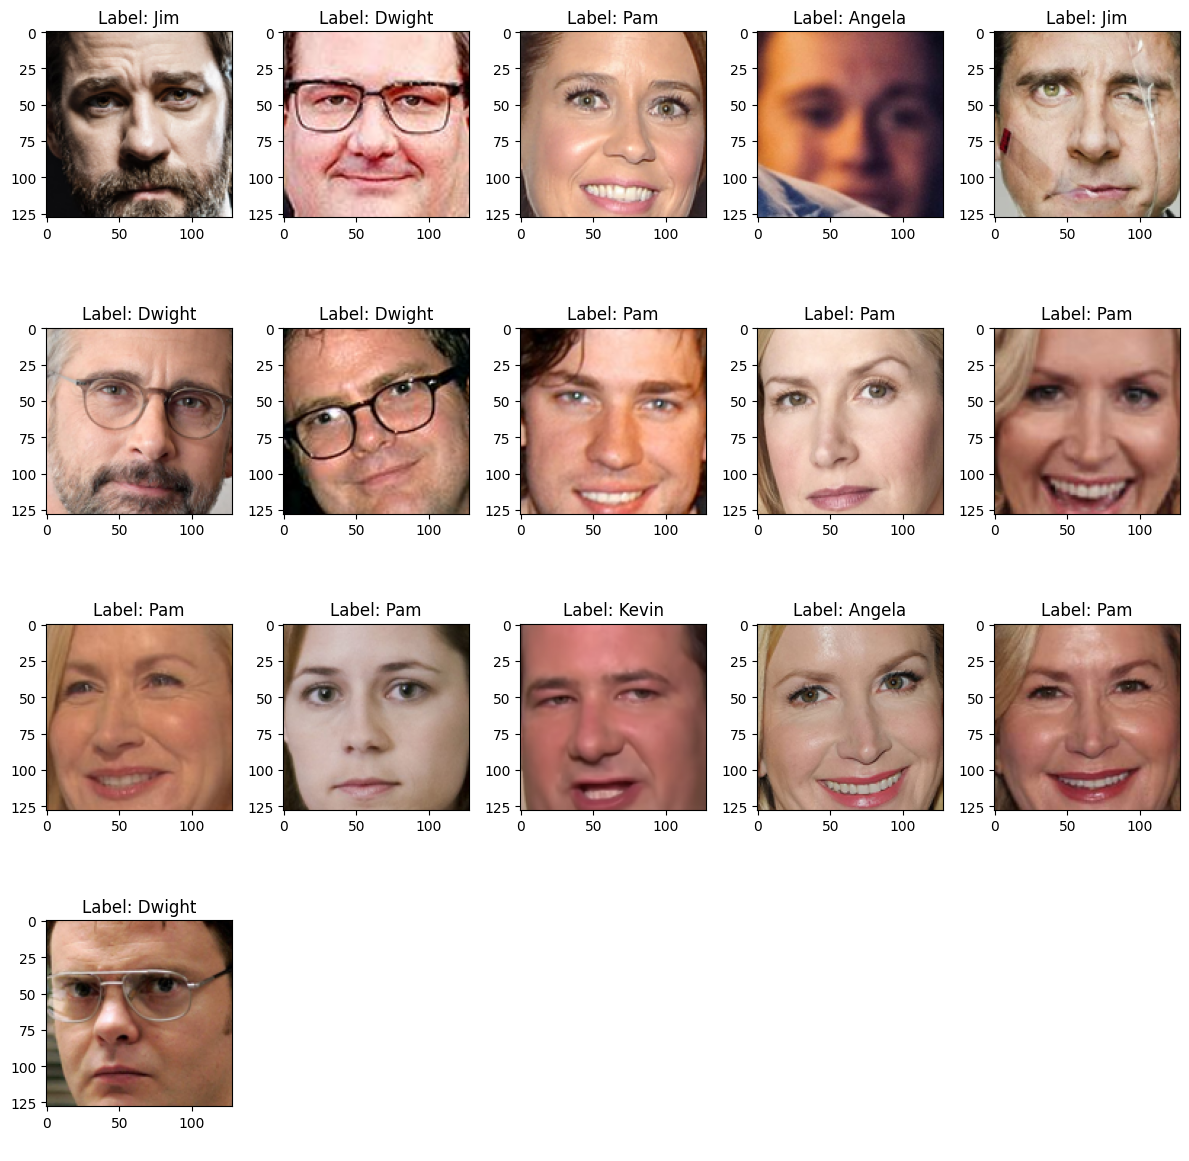

In [75]:
# Determine the number of rows and columns based on the number of images
num_rows = int(len(images) ** 0.5)
num_cols = int(len(images) ** 0.5) + 1

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes so we can iterate over them as a 1D array
axes = axes.flatten()

# Iterate over the images and plot them in separate subplots
for idx, image in enumerate(images):
    # Plot the image in the current subplot
    axes[idx].imshow(image)
    axes[idx].set_title(f'Label: {label[idx]}')

# Hide any unused subplots
for i in range(len(images), num_rows*num_cols):
    axes[i].axis('off')

# Adjust the layout and display the figure
fig.tight_layout()
plt.show()